# Project 2: Investigate the Soccer Database, by Dyke Ferber

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Data Wrangling (General Part)</a></li>
<li><a href="#wrangling2">Data Wrangling (Specific Part)</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis (Research Questions 1-3)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: In this notebook I will take use of the `Soccer Database` to wrangle, explore and investigate questions related to soccer data. This database is a collection of observations of football players, including a lot of statistics on their game play, their teams, matches etc and corresponding attributes in the game FIFA Football.
The entire database can be downloaded via https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite. To follow the investigation as in this notebook, download the dataset, store it in the same directory as this file and execute the cells.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os, sys, zipfile
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
with zipfile.ZipFile(os.path.join(os.getcwd(), "archive.zip"), "r") as fp:
    zipfile.ZipFile.extractall(fp)

In [4]:
db_path = os.path.join(os.getcwd(), "database.sqlite")

def connect_database(db_path):
    
    """ Instantiate a connection to a SQLite database
    INPUT: db_path : (string) containing path to database
    OUTPUT: Connection to database or error if fail """
    
    connection = None
    try:
        connection = sqlite3.connect(db_path)
        return connection
    except sqlite3.Error as e:
        print(e)
    return connection

connection = connect_database(db_path)

In [5]:
tbl_list = ["Country", "League", "Match", "Player", 
           "Player_Attributes", "Team", "Team_Attributes"]

def select_all_tbls(connection, tables):
    
    """ Return data from all tables included in the database
    INPUT: connection (sqlite3 object) holding a connection to the db
    OUTPUT: Data from tables specified in tables """
    
    df_dict = {}
    for tbl in tables:
        df = pd.read_sql_query("SELECT * FROM {}".format(tbl), connection)
        df_dict[tbl] = df
    return df_dict

df_dict = select_all_tbls(connection, tables=tbl_list)

<a id='wrangling1'></a>
## Data Wrangling 1

> **General Properties**: After extracting the tables specified in `tbl_list` into our current working memory in df_dict (keys = table name, values = dataframes) we can begin our initial exploration. We need to keep in mind, that this way of loading all data into the workspace is computationally not the most efficient way, but as we want to get a first glimpse onto our data and ask what questions it can answer at all, I prefer doing this in Python and then finally just discard the dataframes that we will no longer consider for our final investigations. Another way would be to do a initial exploration in Text Editors first and ultimately just load the data we need into this workspace.

**Procedure:**
   1. Explore the shape and content of our `df_dict`.  
   2. Decompose `df_dict` into single dataframes.  
   3. We are most interested in having a look at individual player attributes. The dataset contains information about real life player characteristics like speed, acceleration, ball control and their corresponding ratings in the computer game FIFA. We'll therefore have a first look at the `player_df`.   
   4. The `player_df` only contains some very basic information about the players, like height and weight, birthdate and their database ID. The interesting attributes however can be found in the `player_attr_df`, so we will next have a quick look at it, including its dimensions, its column names and its data types.
   5. In this notebook, as described later, we will focus on the questions which attribute makes a good - rated football player, so we will not have a deeper look on the other data that is provided including countries, leagues, football teams and their matches. Instead of exploring these, we will just drop them.    

In [6]:
# 1
for item, vals in df_dict.items():
    print(item, vals.shape)

Country (11, 2)
League (11, 3)
Match (25979, 115)
Player (11060, 7)
Player_Attributes (183978, 42)
Team (299, 5)
Team_Attributes (1458, 25)


In [7]:
# 2
import operator as op

country_df, league_df, match_df = op.itemgetter("Country", "League", "Match")(df_dict)
player_df, player_attr_df = op.itemgetter("Player", "Player_Attributes")(df_dict)
team_df, team_attr_df = op.itemgetter("Team", "Team_Attributes")(df_dict)

In [8]:
# 3
player_df.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [9]:
# 3
player_df.describe()

id  player_api_id  player_fifa_api_id        height  \
count  11060.000000   11060.000000        11060.000000  11060.000000   
mean    5537.511392  156582.427215       165664.910488    181.867445   
std     3197.692647  160713.700624        58649.928360      6.369201   
min        1.000000    2625.000000            2.000000    157.480000   
25%     2767.750000   35555.500000       151889.500000    177.800000   
50%     5536.500000   96619.500000       184671.000000    182.880000   
75%     8306.250000  212470.500000       203883.250000    185.420000   
max    11075.000000  750584.000000       234141.000000    208.280000   

             weight  
count  11060.000000  
mean     168.380289  
std       14.990217  
min      117.000000  
25%      159.000000  
50%      168.000000  
75%      179.000000  
max      243.000000

In [10]:
# 3
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [11]:
# 4 
player_attr_df.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties  marking  standing_tackle  sliding_tackle  \
0  ...    54.0       48.0     65.0             69.0            69.0   
1  ...    54.0       48.0     65.0             69.0            69.0   
2  ...    54.0       48.0     65.0             66.0            69.0   
3  ...    53.0       47.0     62.0             63.0            66.0   
4  ...    53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

In [12]:
# 4
player_attr_df.describe()

id  player_fifa_api_id  player_api_id  overall_rating  \
count  183978.00000       183978.000000  183978.000000   183142.000000   
mean    91989.50000       165671.524291  135900.617324       68.600015   
std     53110.01825        53851.094769  136927.840510        7.041139   
min         1.00000            2.000000    2625.000000       33.000000   
25%     45995.25000       155798.000000   34763.000000       64.000000   
50%     91989.50000       183488.000000   77741.000000       69.000000   
75%    137983.75000       199848.000000  191080.000000       73.000000   
max    183978.00000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  183142.000000  183142.000000  183142.000000     183142.000000   
mean       73.460353      55.086883      49.921078         57.266023   
std         6.592271      17.242135      19.038705         16.488905   
min        39.000000       1.000000       1.000000          1.000000   
25%        69.000000      45.000000      34.000000         49.000000   
50%        74.000000      59.000000      53.000000         60.000000   
75%        78.000000      68.000000      65.000000         68.000000   
max        97.000000      95.000000      97.000000         98.000000   

       short_passing        volleys  ...         vision      penalties  \
count  183142.000000  181265.000000  ...  181265.000000  183142.000000   
mean       62.429672      49.468436  ...      57.873550      55.003986   
std        14.194068      18.256618  ...      15.144086      15.546519   
min         3.000000       1.000000  ...       1.000000       2.000000   
25%        57.000000      35.000000  ...      49.000000      45.000000   
50%        65.000000      52.000000  ...      60.000000      57.000000   
75%        72.000000      64.000000  ...      69.000000      67.000000   
max        97.000000      93.000000  ...      97.000000      96.000000   

             marking  standing_tackle  sliding_tackle      gk_diving  \
count  183142.000000    183142.000000   181265.000000  183142.000000   
mean       46.772242        50.351257       48.001462      14.704393   
std        21.227667        21.483706       21.598778      16.865467   
min         1.000000         1.000000        2.000000       1.000000   
25%        25.000000        29.000000       25.000000       7.000000   
50%        50.000000        56.000000       53.000000      10.000000   
75%        66.000000        69.000000       67.000000      13.000000   
max        96.000000        95.000000       95.000000      94.000000   

         gk_handling     gk_kicking  gk_positioning    gk_reflexes  
count  183142.000000  183142.000000   183142.000000  183142.000000  
mean       16.063612      20.998362       16.132154      16.441439  
std        15.867382      21.452980       16.099175      17.198155  
min         1.000000       1.000000        1.000000       1.000000  
25%         8.000000       8.000000        8.000000       8.000000  
50%        11.000000      12.000000       11.000000      11.000000  
75%        15.000000      15.000000       15.000000      15.000000  
max        93.000000      97.000000       96.000000      96.000000  

[8 rows x 38 columns]

In [13]:
# 4
player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [14]:
# 5
del (country_df, league_df, match_df, team_df, team_attr_df)

<a id='wrangling2'></a>
## Data Wrangling 2

> **Specific Properties**: We now have two dataframes left (`player_df` and `player_attr_df`). We will use these to answer 3 key questions:
   1. Who are the top football players according to the Soccer Database ? 
   2. Who are the top football players according to the Soccer Database ?
   3. What makes players good in `penalties` ?

**Procedure:**
   1. Merge the two dataframes together. `player_df` except from the real players name almost contains no useful information that we want to have a look at. We can use the ID columns to identify matching rows. For sake of saving time while typing store the new dataframe as `df`, though keep in mind that if we would need to handle many dataframes at once, this is not the best coding practice.
  

In [15]:
df = pd.merge(player_df, player_attr_df, on = ['player_fifa_api_id', 'player_api_id'], how = "inner", suffixes = ["_player_df", "player_attr_df"])
df.head()

id_player_df  player_api_id         player_name  player_fifa_api_id  \
0             1         505942  Aaron Appindangoye              218353   
1             1         505942  Aaron Appindangoye              218353   
2             1         505942  Aaron Appindangoye              218353   
3             1         505942  Aaron Appindangoye              218353   
4             1         505942  Aaron Appindangoye              218353   

              birthday  height  weight  idplayer_attr_df                 date  \
0  1992-02-29 00:00:00  182.88     187                 1  2016-02-18 00:00:00   
1  1992-02-29 00:00:00  182.88     187                 2  2015-11-19 00:00:00   
2  1992-02-29 00:00:00  182.88     187                 3  2015-09-21 00:00:00   
3  1992-02-29 00:00:00  182.88     187                 4  2015-03-20 00:00:00   
4  1992-02-29 00:00:00  182.88     187                 5  2007-02-22 00:00:00   

   overall_rating  ...  vision penalties marking standing_tackle  \
0            67.0  ...    54.0      48.0    65.0            69.0   
1            67.0  ...    54.0      48.0    65.0            69.0   
2            62.0  ...    54.0      48.0    65.0            66.0   
3            61.0  ...    53.0      47.0    62.0            63.0   
4            61.0  ...    53.0      47.0    62.0            63.0   

   sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0            69.0        6.0         11.0        10.0             8.0   
1            69.0        6.0         11.0        10.0             8.0   
2            69.0        6.0         11.0        10.0             8.0   
3            66.0        5.0         10.0         9.0             7.0   
4            66.0        5.0         10.0         9.0             7.0   

   gk_reflexes  
0          8.0  
1          8.0  
2          8.0  
3          7.0  
4          7.0  

[5 rows x 47 columns]

In [16]:
df.describe()

id_player_df  player_api_id  player_fifa_api_id         height  \
count  183766.000000  183766.000000       183766.000000  183766.000000   
mean     5519.224329  135957.515514       165645.222642     181.875022   
std      3191.116495  136979.374220        53870.761415       6.395603   
min         1.000000    2625.000000            2.000000     157.480000   
25%      2752.250000   34763.000000       155715.750000     177.800000   
50%      5530.000000   77767.000000       183480.000000     182.880000   
75%      8254.000000  191081.000000       199848.000000     185.420000   
max     11075.000000  750584.000000       234141.000000     208.280000   

              weight  idplayer_attr_df  overall_rating      potential  \
count  183766.000000     183766.000000   183016.000000  183016.000000   
mean      168.769974      91973.292715       68.597522      73.457851   
std        15.092227      53104.857009        7.041099       6.591720   
min       117.000000          1.000000       33.000000      39.000000   
25%       159.000000      45986.250000       64.000000      69.000000   
50%       168.000000      91946.500000       69.000000      74.000000   
75%       179.000000     137950.750000       73.000000      78.000000   
max       243.000000     183978.000000       94.000000      97.000000   

            crossing      finishing  ...         vision      penalties  \
count  183016.000000  183016.000000  ...  181139.000000  183016.000000   
mean       55.081687      49.913308  ...      57.868212      55.001770   
std        17.237884      19.035742  ...      15.139479      15.544212   
min         1.000000       1.000000  ...       1.000000       2.000000   
25%        45.000000      34.000000  ...      49.000000      45.000000   
50%        59.000000      53.000000  ...      60.000000      57.000000   
75%        68.000000      65.000000  ...      69.000000      67.000000   
max        95.000000      97.000000  ...      97.000000      96.000000   

             marking  standing_tackle  sliding_tackle      gk_diving  \
count  183016.000000    183016.000000   181139.000000  183016.000000   
mean       46.787958        50.366340       48.015458      14.701818   
std        21.226081        21.481806       21.598718      16.859877   
min         1.000000         1.000000        2.000000       1.000000   
25%        25.000000        29.000000       25.000000       7.000000   
50%        50.000000        56.000000       53.000000      10.000000   
75%        66.000000        69.000000       67.000000      13.000000   
max        96.000000        95.000000       95.000000      94.000000   

         gk_handling     gk_kicking  gk_positioning    gk_reflexes  
count  183016.000000  183016.000000   183016.000000  183016.000000  
mean       16.062158      21.000158       16.130770      16.438606  
std        15.862486      21.451958       16.095255      17.192893  
min         1.000000       1.000000        1.000000       1.000000  
25%         8.000000       8.000000        8.000000       8.000000  
50%        11.000000      12.000000       11.000000      11.000000  
75%        15.000000      15.000000       15.000000      15.000000  
max        93.000000      97.000000       96.000000      96.000000  

[8 rows x 41 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 47 columns):
id_player_df           183766 non-null int64
player_api_id          183766 non-null int64
player_name            183766 non-null object
player_fifa_api_id     183766 non-null int64
birthday               183766 non-null object
height                 183766 non-null float64
weight                 183766 non-null int64
idplayer_attr_df       183766 non-null int64
date                   183766 non-null object
overall_rating         183016 non-null float64
potential              183016 non-null float64
preferred_foot         183016 non-null object
attacking_work_rate    180622 non-null object
defensive_work_rate    183016 non-null object
crossing               183016 non-null float64
finishing              183016 non-null float64
heading_accuracy       183016 non-null float64
short_passing          183016 non-null float64
volleys                181139 non-null float64
dribbling   

<a id='Cleaning'></a>
## Data Cleaning

1. Check in the dataset is complete. Especially we want to know if there are any players, for which there is at least one missing attribute.
2. Repeat the same for columns: Which columns have missing information?

In [18]:
# 1
print(df.isna().any(1).sum())
print(df.isna().sum().sum())

3538
44033


In [19]:
# 2
for col in df.columns:
    print(col, "containing", df[col].isna().sum(), "null values")

id_player_df containing 0 null values
player_api_id containing 0 null values
player_name containing 0 null values
player_fifa_api_id containing 0 null values
birthday containing 0 null values
height containing 0 null values
weight containing 0 null values
idplayer_attr_df containing 0 null values
date containing 0 null values
overall_rating containing 750 null values
potential containing 750 null values
preferred_foot containing 750 null values
attacking_work_rate containing 3144 null values
defensive_work_rate containing 750 null values
crossing containing 750 null values
finishing containing 750 null values
heading_accuracy containing 750 null values
short_passing containing 750 null values
volleys containing 2627 null values
dribbling containing 750 null values
curve containing 2627 null values
free_kick_accuracy containing 750 null values
long_passing containing 750 null values
ball_control containing 750 null values
acceleration containing 750 null values
sprint_speed containing 7

3. The question now is how we are going to handle this information. We could drop rows, containing at least one missing information, but this would also cost us valuable details about other attributes from the same, dropped player that would be available. We could also just ignore NA and keep them as they are, or, and thats how we are going to do this, we can impute missing values with some data statistic, like filling them with them mean of the corresponding columns.

In [20]:
# 3
for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        df[col].fillna(df[col].mean(), inplace=True)

print(df.isna().any(1).sum())
print(df.isna().sum().sum())

3144
4644


4. So while we could not drastically decrease the rows (players) containing at least one missing information, we could reduce the size number of overall not available information by a factor of almost 10. Next, we will have a look at the datatypes. As we can see, most of the players attributes are `float64`, which is already perfect for doing statistical computings later. The `birthday`and `date` columns however are of type string (object), so convert them to a pandas datetime series. This way, we can have a look at a players evolution over time later and handle these as time series more easily later.

In [21]:
# 4
df.dtypes

id_player_df             int64
player_api_id            int64
player_name             object
player_fifa_api_id       int64
birthday                object
height                 float64
weight                   int64
idplayer_attr_df         int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength

In [22]:
df["date"] = pd.to_datetime(df.date)
df["birthday"] = pd.to_datetime(df.birthday)

In [23]:
df.dtypes

id_player_df                    int64
player_api_id                   int64
player_name                    object
player_fifa_api_id              int64
birthday               datetime64[ns]
height                        float64
weight                          int64
idplayer_attr_df                int64
date                   datetime64[ns]
overall_rating                float64
potential                     float64
preferred_foot                 object
attacking_work_rate            object
defensive_work_rate            object
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility     

5. After converting the times, we are done with cleaning so far. While analysing and investigating this dataset, we might do some rearrangements and other, more specific cleaning steps, but preliminarily we can keep the data as is. For convenience, store it as a clean .csv file to be able to load it in next time we might need it.

In [24]:
df.to_csv("processed_football_players.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Part 1:** Now that we have cleaned the dataset, investigated its datatypes and performed some initial statistics, its time to get a glimpse on what we can do with this dataset. The most obvious question now is, who these top players in this dataset are. We will explore it in two ways, once computationally by statistics and second by doing visuals. 

### Question 1: Who are the top football players according to the Soccer Database ?
> Sort the dataframe according to the overall_rating column.

In [25]:
df.sort_values("overall_rating", ascending=False, inplace=True)
df.head(30)

id_player_df  player_api_id        player_name  player_fifa_api_id  \
102419          6176          30981       Lionel Messi              158023   
102432          6176          30981       Lionel Messi              158023   
102421          6176          30981       Lionel Messi              158023   
102428          6176          30981       Lionel Messi              158023   
102429          6176          30981       Lionel Messi              158023   
102430          6176          30981       Lionel Messi              158023   
102431          6176          30981       Lionel Messi              158023   
102420          6176          30981       Lionel Messi              158023   
102433          6176          30981       Lionel Messi              158023   
102435          6176          30981       Lionel Messi              158023   
102436          6176          30981       Lionel Messi              158023   
102434          6176          30981       Lionel Messi              158023   
102422          6176          30981       Lionel Messi              158023   
33287           1995          30893  Cristiano Ronaldo               20801   
33288           1995          30893  Cristiano Ronaldo               20801   
178763         10749          30829       Wayne Rooney               54050   
63831           3826          30717   Gianluigi Buffon                1179   
33286           1995          30893  Cristiano Ronaldo               20801   
102423          6176          30981       Lionel Messi              158023   
102427          6176          30981       Lionel Messi              158023   
102426          6176          30981       Lionel Messi              158023   
102424          6176          30981       Lionel Messi              158023   
102425          6176          30981       Lionel Messi              158023   
33295           1995          30893  Cristiano Ronaldo               20801   
33289           1995          30893  Cristiano Ronaldo               20801   
33290           1995          30893  Cristiano Ronaldo               20801   
33291           1995          30893  Cristiano Ronaldo               20801   
33292           1995          30893  Cristiano Ronaldo               20801   
33293           1995          30893  Cristiano Ronaldo               20801   
33294           1995          30893  Cristiano Ronaldo               20801   

         birthday  height  weight  idplayer_attr_df       date  \
102419 1987-06-24  170.18     159            102483 2015-12-17   
102432 1987-06-24  170.18     159            102496 2013-03-08   
102421 1987-06-24  170.18     159            102485 2015-09-21   
102428 1987-06-24  170.18     159            102492 2014-04-25   
102429 1987-06-24  170.18     159            102493 2013-11-15   
102430 1987-06-24  170.18     159            102494 2013-09-20   
102431 1987-06-24  170.18     159            102495 2013-03-22   
102420 1987-06-24  170.18     159            102484 2015-10-16   
102433 1987-06-24  170.18     159            102497 2013-02-15   
102435 1987-06-24  170.18     159            102499 2012-02-22   
102436 1987-06-24  170.18     159            102500 2011-08-30   
102434 1987-06-24  170.18     159            102498 2012-08-31   
102422 1987-06-24  170.18     159            102486 2015-06-26   
33287  1985-02-05  185.42     176             33332 2015-09-25   
33288  1985-02-05  185.42     176             33333 2015-09-21   
178763 1985-10-24  175.26     183            178976 2007-02-22   
63831  1978-01-28  193.04     201             63876 2007-02-22   
33286  1985-02-05  185.42     176             33331 2015-10-16   
102423 1987-06-24  170.18     159            102487 2015-03-13   
102427 1987-06-24  170.18     159            102491 2014-09-18   
102426 1987-06-24  170.18     159            102490 2014-10-17   
102424 1987-06-24  170.18     159            102488 2015-02-20   
102425 1987-06-24  170.18     159            102489 2015-01-23   
33295

> According to this database, Lionel Messi is the highest ranked (~94 points) football player, even across differnt years, followed by Cristiano Ronaldo, Gianluigi Buffon and Wayne Rooney. 
In this way however, we cannot further do any visualisations because we have the same players accross multiple rows. We therefore will compute a summary statistic first, that we can then use for visualisations.

In [26]:
stats = df.groupby("player_name")["overall_rating"].agg(["mean", "median", "min", "max", "std"]).sort_values("mean", ascending = False)
stats = stats.reset_index()
stats

player_name       mean  median   min   max       std
0            Lionel Messi  92.192308    93.0  85.0  94.0  2.545887
1       Cristiano Ronaldo  91.280000    92.0  87.0  93.0  1.541644
2           Franck Ribery  88.458333    88.5  85.0  90.0  1.614585
3          Andres Iniesta  88.320000    89.0  83.0  91.0  2.115813
4      Zlatan Ibrahimovic  88.285714    89.0  85.0  90.0  1.309307
...                   ...        ...     ...   ...   ...       ...
10843  Jordan Kirkpatrick  45.500000    45.0  45.0  47.0  1.000000
10844    Boubacar Mansaly  45.200000    41.0  41.0  60.0  8.318654
10845       Badis Lebbihi  45.000000    42.5  41.0  54.0  6.164414
10846   Gianluca D'Angelo  43.750000    43.0  42.0  47.0  2.217356
10847     Frederic Schaub  43.000000    43.0  42.0  44.0  1.154701

[10848 rows x 6 columns]

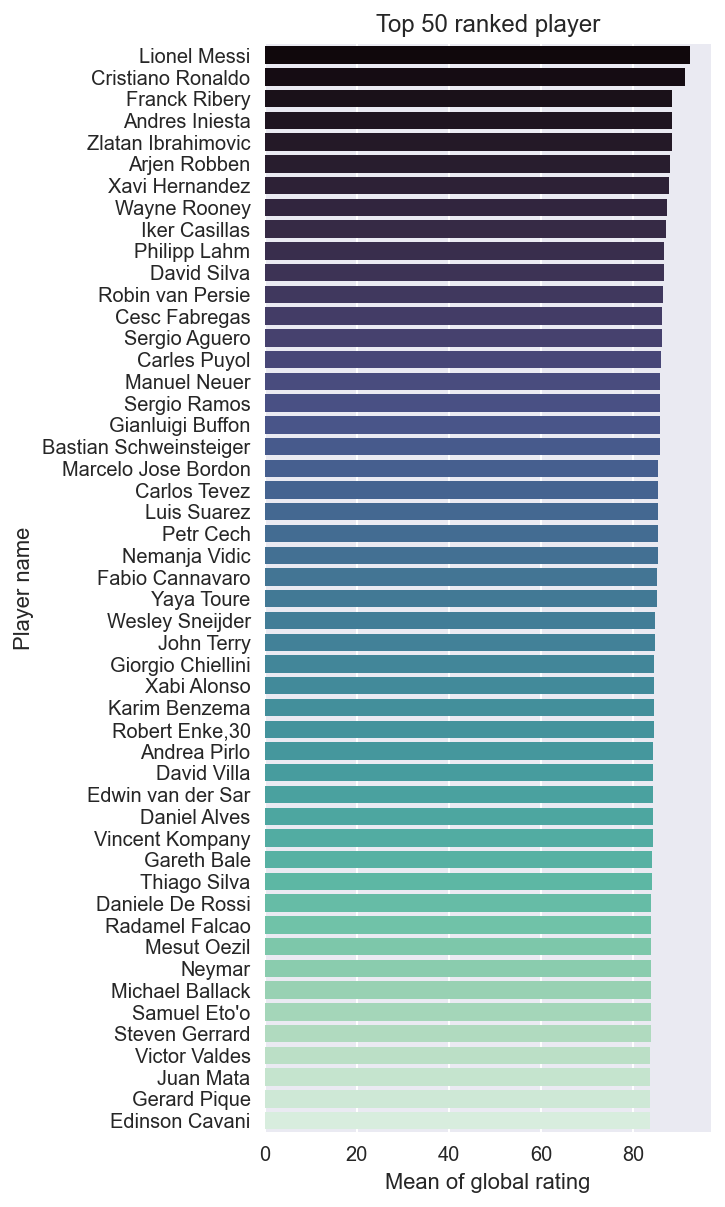

In [27]:
top50 = stats[:50] # crop the top 50 player

plt.style.use("seaborn")
plt.figure(figsize=(4,10))
sns.barplot(data = top50, x="mean", y="player_name", palette="mako");
plt.title("Top 50 ranked player");
plt.xlabel("Mean of global rating");
plt.ylabel("Player name");

plt.savefig("top50_players.png")

In [28]:
# extract years from the "date" column and store in "obs_year"
df["obs_year"] = df.date.dt.year
df["obs_year"] 

102419    2015
102432    2013
102421    2015
102428    2014
102429    2013
          ... 
132109    2007
131768    2009
76507     2008
57790     2007
57789     2007
Name: obs_year, Length: 183766, dtype: int64

In [29]:
df.obs_year.unique()

array([2015, 2013, 2014, 2012, 2011, 2007, 2009, 2008, 2016, 2010])

In [30]:
# subset the dataframe based on the top 10 names in the top50 dataframe.
evolution = df.loc[df.player_name.isin(top50.player_name[:10]), :]

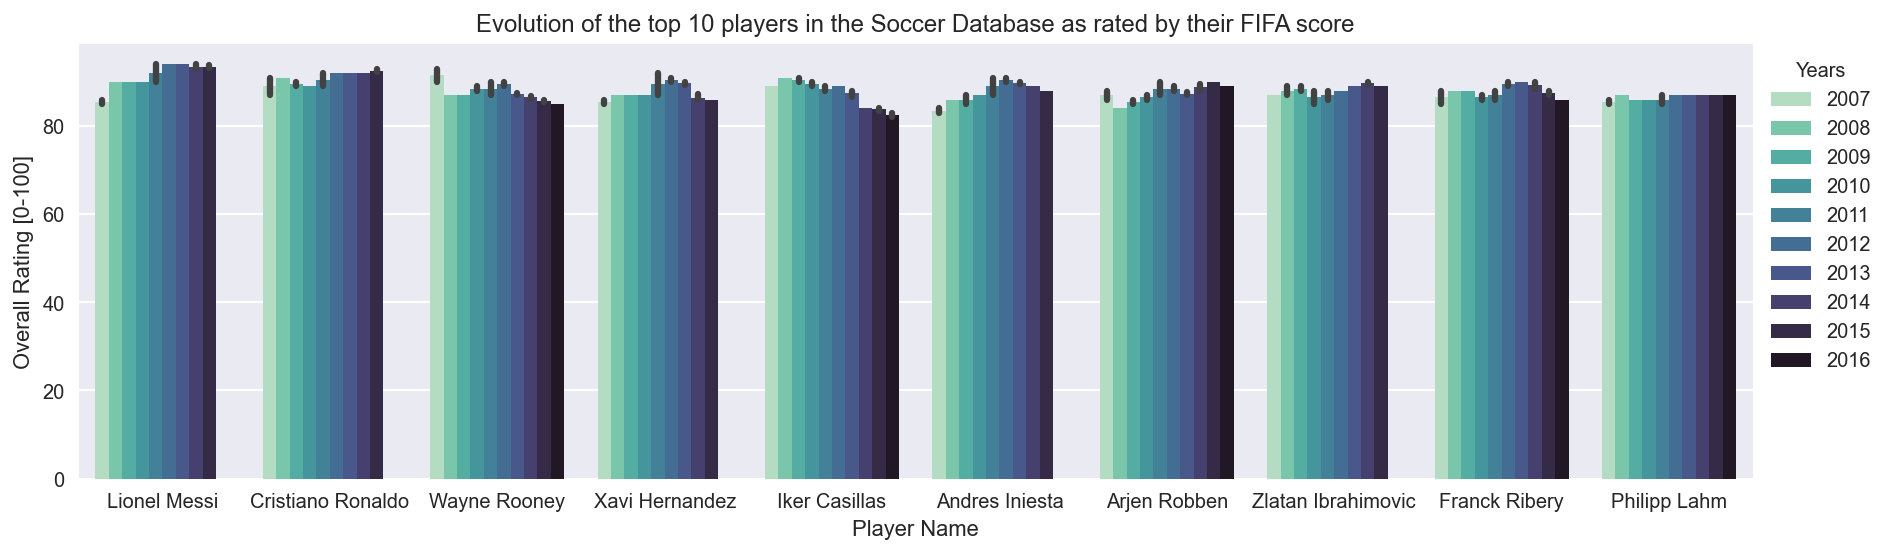

In [31]:
plt.figure(figsize=(15,4))
sns.barplot(data = evolution, y="overall_rating", x="player_name", hue="obs_year", palette="mako_r");
plt.legend(bbox_to_anchor=(1,1), title="Years");
plt.title("Evolution of the top 10 players in the Soccer Database as rated by their FIFA score");
plt.xlabel("Player Name");
plt.ylabel("Overall Rating [0-100]");

plt.savefig("top10_evolution.png")

> As we can see in this barchart, Lionel Messi has largely improved his score from 2007 to 2016, so does Cristiano Ronaldo. Players like Iker Cassillas and Wayne Rooney have however lost some points throughout the years. Others, like Philipp Lahm or Zlatan Ibrahimovic have mostly stayed at the same score throughout the period of observation.

### Question 2: Who are the top football players according to the Soccer Database ?
> Create a correlation heatmap to get a first overview of player attributes that correlate (EDA), then extract attributes that show a high correlation to the overall player score and examine them further.

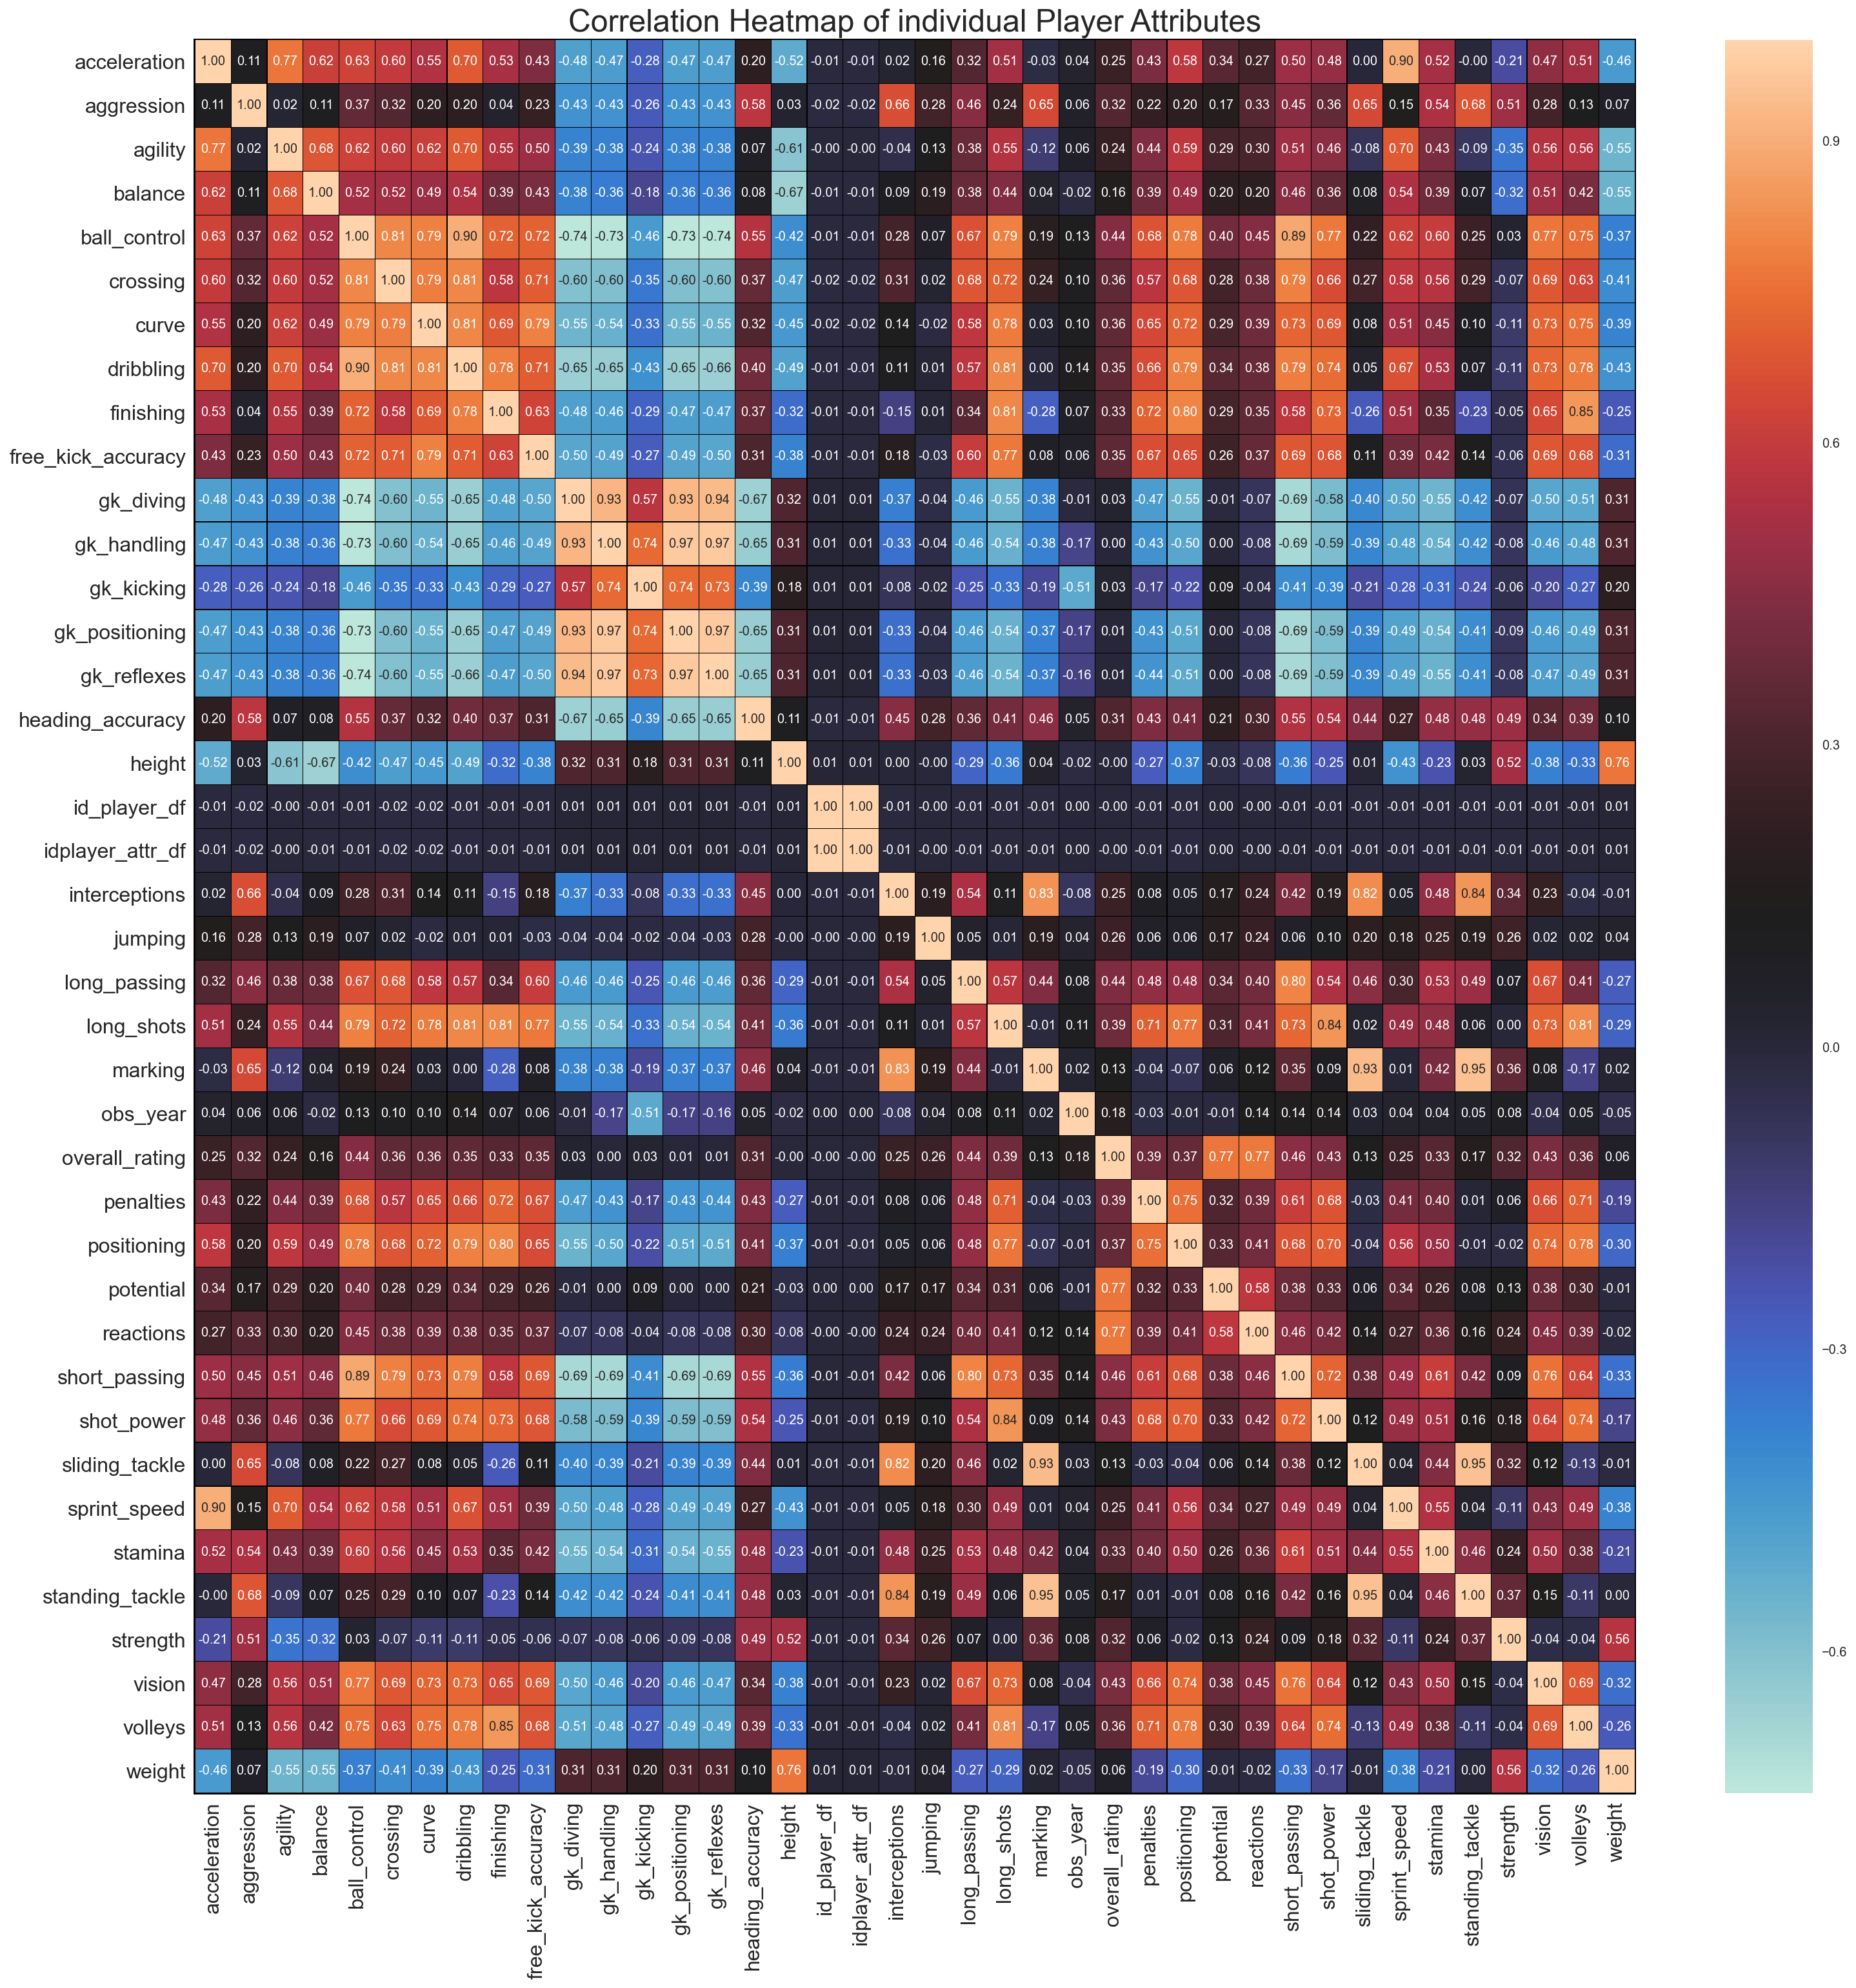

In [32]:
plt.figure(figsize=(25,25))
exclude_cols = ["id", "player_fifa_api_id", "player_api_id"]
plot_cols = df.columns.difference(exclude_cols)
fig = sns.heatmap(df[plot_cols].corr(),
           cmap="icefire", 
           annot=True, fmt = ".2f",
           linewidths=0.1, linecolor="black");
plt.title("Correlation Heatmap of individual Player Attributes", fontsize=24);
fig.set_xticklabels(fig.get_xmajorticklabels(), fontsize = 16);
fig.set_yticklabels(fig.get_xmajorticklabels(), fontsize = 16);
fig.patch.set_edgecolor("black");
fig.patch.set_linewidth("2")  

plt.savefig("correlations.png")

> As we can see in this correlation heatmap, some attributes show a very obvious relationshipt. Standing tackle and sliding tackling show a correlation of ~0.95, players that provide good long shots also show high ball control (0.79) and players that are good at dribbling show great ball control too (0.9). We next want to know which of these attributes are most likely to be of utmost importance for achieving great FIFA scores. Therefore create a `corr_dict`, this is going to store all variables correlation value when compared to the `overall_rating` column.

In [33]:
corr_dict = {}
o_r = df.overall_rating
for col in df.columns.difference(["overall_rating"]):
    try:
        corr_dict[col] = o_r.corr(df[col])
    except Exception as e:
        ""

In [34]:
# sort the dictionary reversely and show the top 10

sorted_correls = sorted(corr_dict.items(), key = lambda x: x[1])
sorted_correls[-10:]

[('positioning', 0.36983420069999895),
 ('long_shots', 0.39226549978054637),
 ('penalties', 0.39312504170143964),
 ('vision', 0.42800823979830704),
 ('shot_power', 0.4281499652104058),
 ('long_passing', 0.4350011794232307),
 ('ball_control', 0.44419660060156374),
 ('short_passing', 0.4582926513082183),
 ('potential', 0.7666778455660364),
 ('reactions', 0.7692180040383519)]

> Overall, it does not appear that there is one single player characteristic that makes a good player. As we know, players like Cristino Ronaldo or Lionel Messi are very versatile players, they are great at ball control, dribbling, give excellent passes, make fantastic free kicks and penalties. It thus appears, that to be a good player like these two, one needs to achieve maximum performance in both of them. We  therefore might need to narrow down our range of observation from an overall rating towards something more specific, like looking at individual attributes alone.
In the last section, we will try to find out if theres any pattern of attributes that players need to have in order to achieve a maximum perfomance in `penalties`.

### Question 3: What makes players good in `penalties` ?

In [35]:
pen_corr = {}
pen = df.penalties
for col in df.columns.difference(["penalties"]):
    try:
        corr = pen.corr(df[col])
        pen_corr[col] = corr
    except Exception as e:
        ""

In [36]:
# sort the dictionary, with increasing correlation values
items = sorted(pen_corr.items(), key = lambda x: x[1])
plot_items = sorted(pen_corr.items(), key = lambda x: x[1])[-10:]

items

[('gk_diving', -0.46654486722227606),
 ('gk_reflexes', -0.4379351070028144),
 ('gk_positioning', -0.4336509431496677),
 ('gk_handling', -0.42918548122112804),
 ('height', -0.2681944812173737),
 ('weight', -0.1922704063801904),
 ('player_fifa_api_id', -0.18186296765121662),
 ('gk_kicking', -0.17331917128678043),
 ('player_api_id', -0.16462430460916147),
 ('marking', -0.03844560476227363),
 ('obs_year', -0.030335557566139745),
 ('sliding_tackle', -0.028716325098555085),
 ('id_player_df', -0.010790110510769953),
 ('idplayer_attr_df', -0.01075312393007118),
 ('standing_tackle', 0.009875780925787298),
 ('jumping', 0.05834199626699858),
 ('strength', 0.06194532420436542),
 ('interceptions', 0.0848505481581333),
 ('aggression', 0.2204370163878772),
 ('potential', 0.316437928285182),
 ('reactions', 0.38820391416859995),
 ('balance', 0.38865003063580755),
 ('overall_rating', 0.39312504170143964),
 ('stamina', 0.3987872754711044),
 ('sprint_speed', 0.4091720591052013),
 ('acceleration', 0.425823

In [37]:
plot_items = np.array(plot_items)
cols = plot_items.T[0]

dfs = df.sample(1000, replace=False)

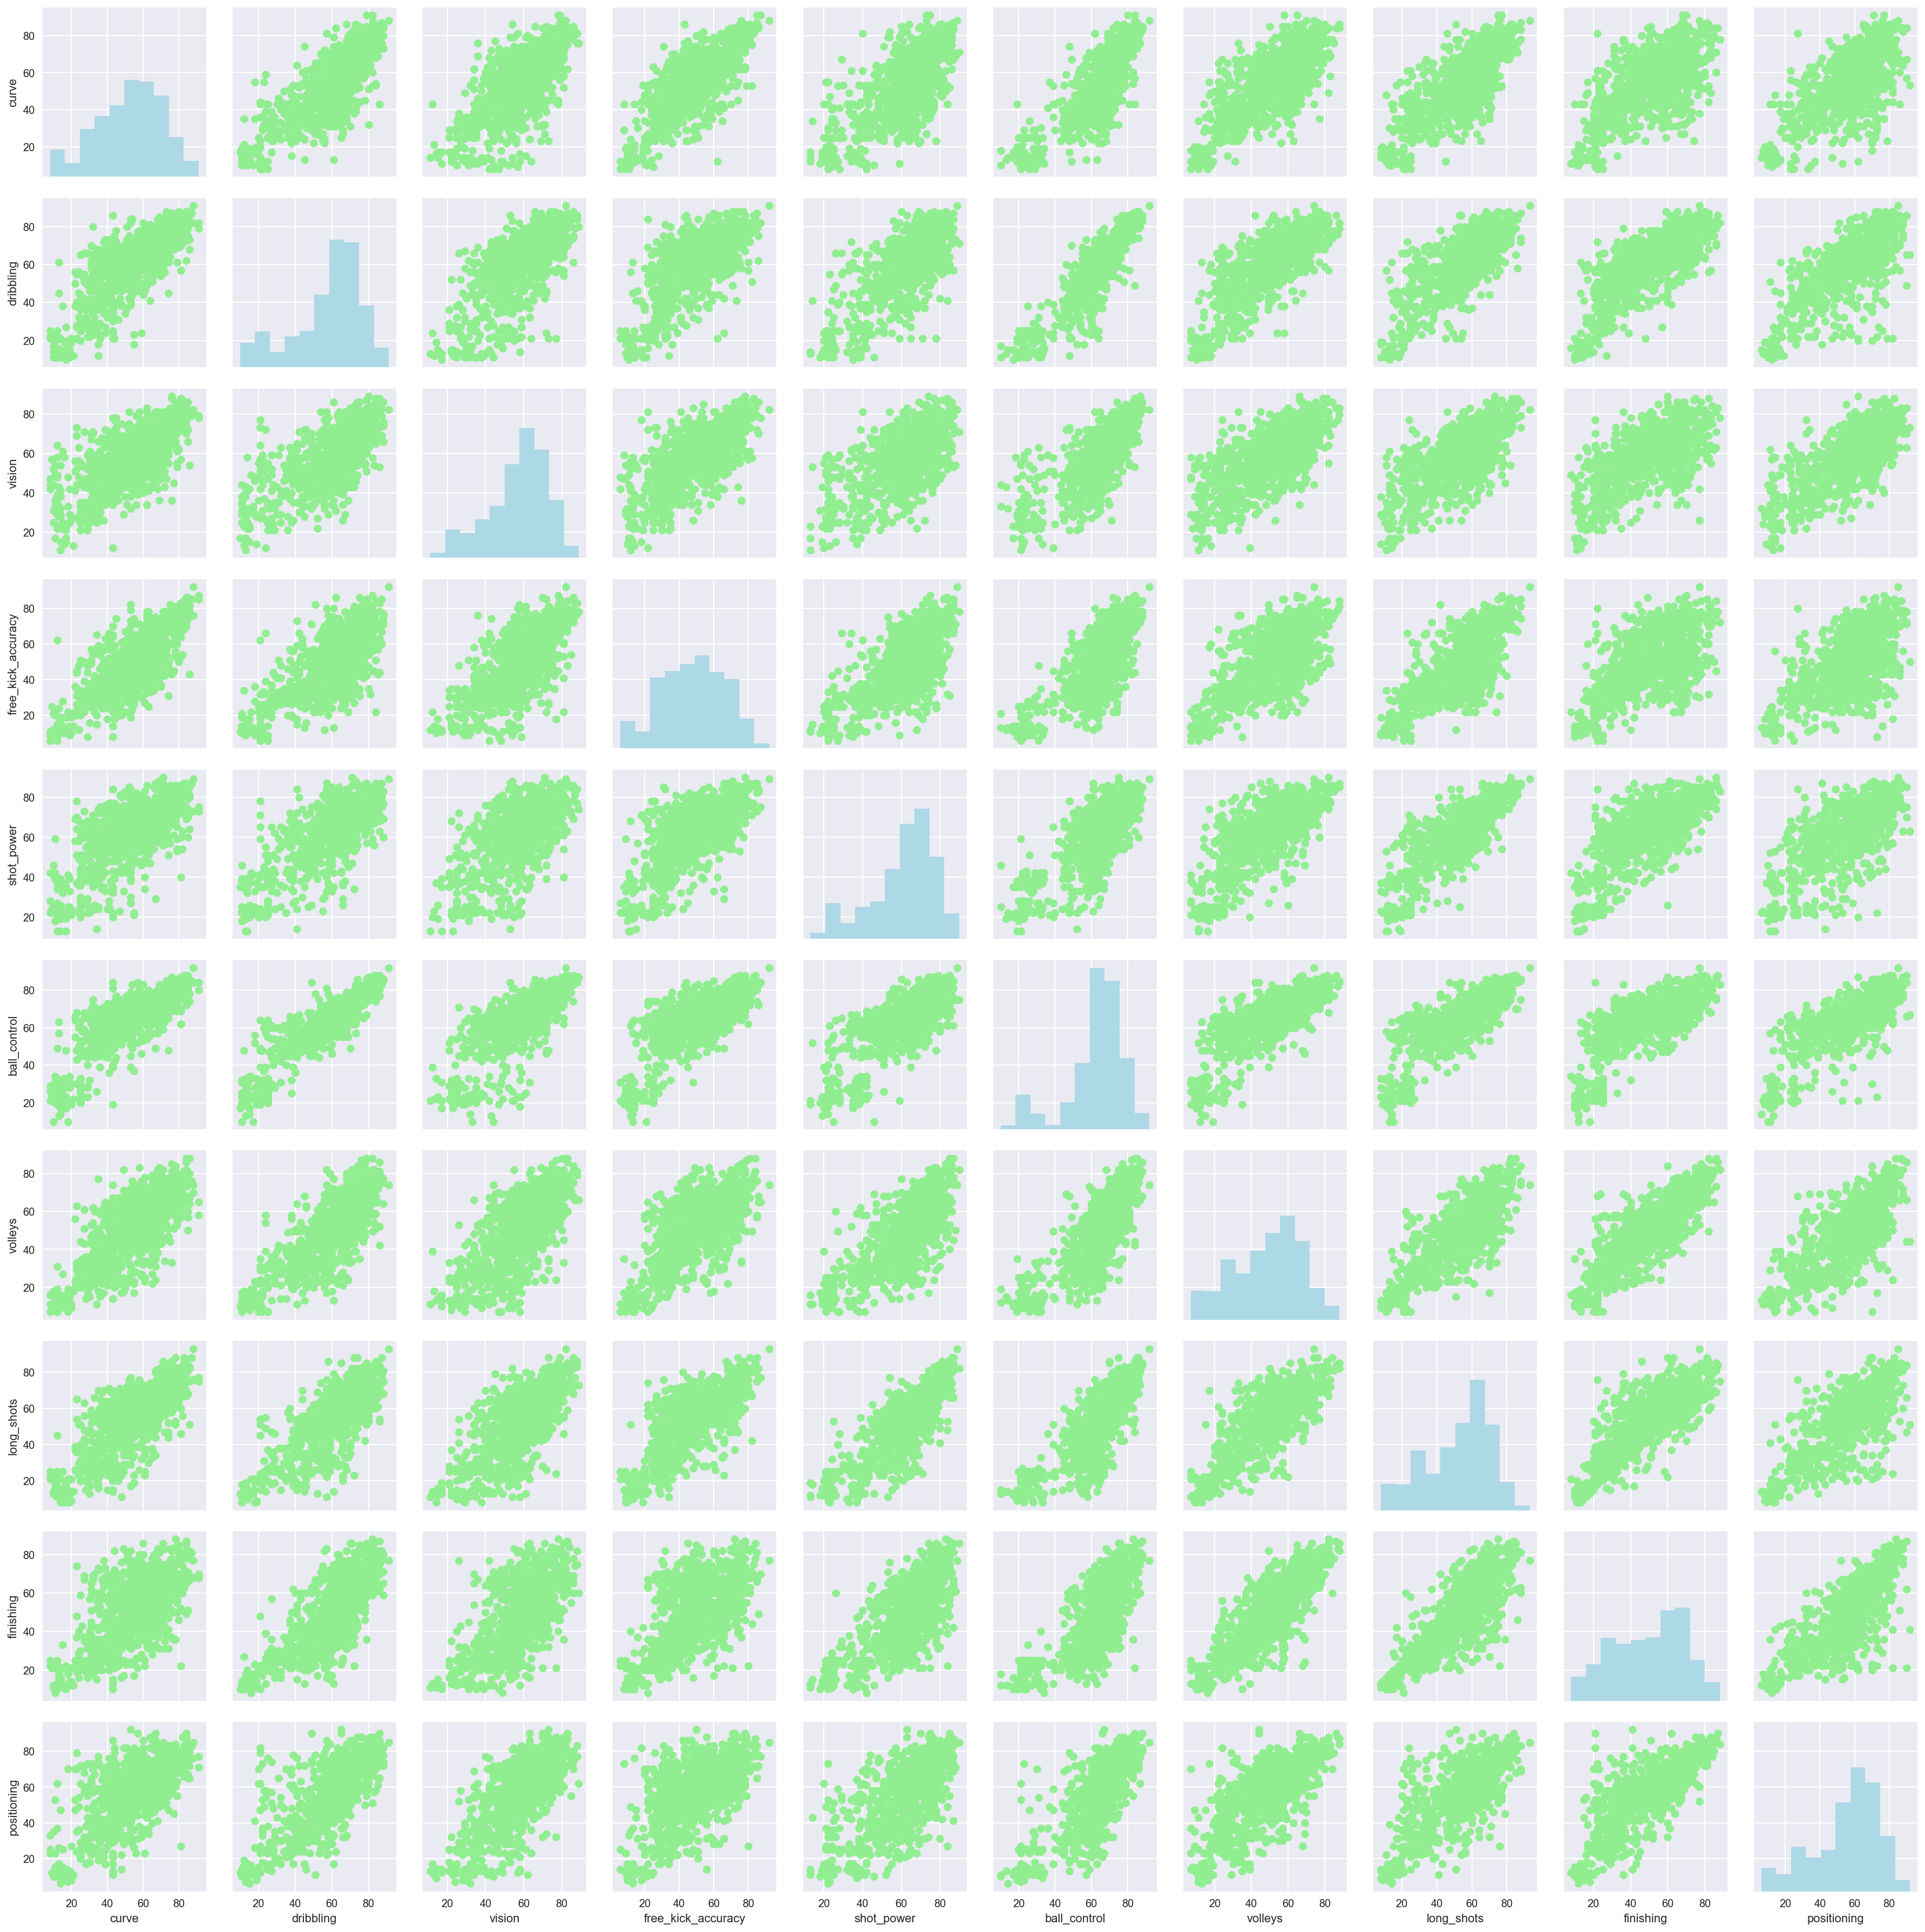

In [38]:
g = sns.PairGrid(data=dfs, vars=cols);
g.map_diag(plt.hist, color="lightblue");
g.map_offdiag(plt.scatter, color="lightgreen");

<a id='conclusions'></a>
## Conclusions

> **`One`** The best football players in the world are Lionel Messi and Cristiano Ronaldo. Both have even improved throughout the years. This is not surprising as both we're very young at the time recording started. Others like Iker Cassillas are a generation older, and their score however decreased throughout the observation period.

> **`Two`** We cannot really get the `one` player characteristic that defines a good rated player, as the maximum correlation values we obtain are only around 0.7 or lower. It appears, that a good player needs a mixture of all of these.

> **`Three`** We next wanted to have a look, what attributes are most important in defining players that perform great penalties. We would excpet naturally that attributes like precision, strength, acceleration would be required. Indeed, attributes like positioning, finishing and long shots are the three most important features. Players that show precision and are able to provide long passes are likely to also score penalties. Volleys are also (0.7) correlated with scoring penalties. Playing good volles requires a lot of ball control and this is most likely to be of benefit also wenn it accounts for penalties. 

> **`Outlook`** Next, one could build some kind of recommendation engine for players. Players could look up their scores, and recieve a recommendation of what they should improve on (for instance penalties). Then the computer could show them the items like positioning finishing and volleys and tell them to spend more time studying these in order to shoot better penalties. It could also look up players that show an extraordinarily high score in each of these features and tell them to analyse these players in more depth in order to learn from them.

> **`Limitations and Shortcomings`** The soccer database contains data from more than 11.000 soccer players around the globe. This should be a large enough dataset size to perform any kind of statistical investigations that we could think of. The palette of attributes that is included very broad including special features of a player like ball control, defensive and offensive capabilities etc, as well as basic information like height, weight and birth. Moreover the soccer database contains a lot more tables about leagues, statistics on football teams and all their matches, that were beyond the scope of this notebook. One thing to notion however is that the observation period ranges from 2006 to 2016 only. The football market is rapidly evolving and thus this dataset is totally out-of-date. Making useful predictions one players that have ever since just evolved in developping their skills is most likely not possible. 